In [31]:
from HMM import unsupervised_HMM, supervised_HMM, merge_HMM
import matplotlib.pyplot as plt
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    sample_sentence_rythme,
    sample_sentence_multipleModel,
    sample_sentence_multipleModel_rythme,
    visualize_sparsities,
    animate_emission
)

## 3 - Pre-processing

In [2]:
from Utility import get_poem_sequence

obs, obs_Y, obs_map = get_poem_sequence('data/shakespeare3.txt', 'line', 'reverse')

#print(obs[:10])
#print(obs_Y[:10])
#print(obs_map['perish_E1'])
#print(obs_map)


1


In [3]:
from Utility import get_rhyme_pair
pairs_endofline = get_rhyme_pair(obs)
#print(pairs_endofline)

In [49]:
count_Y = np.zeros(12)
for iobs in obs_Y:
    for iiobs in iobs:
        count_Y[iiobs] += 1
print(count_Y)

[9.1500e+02 1.2825e+04 7.0600e+02 1.8590e+03 6.0000e+00 2.0100e+02
 2.4000e+02 1.3000e+01 4.7000e+01 6.0000e+00 5.4300e+02 2.7750e+03]


## 5 - Poetry generation, part I - HMM (from HW6)

In [13]:
hmm_supervise = supervised_HMM(obs, obs_Y)

In [35]:
hmm3_1 = unsupervised_HMM(obs, 3, 100, 2019)
hmm3_2 = unsupervised_HMM(obs, 3, 100, 3019)
hmm3_3 = unsupervised_HMM(obs, 3, 100, 4019)
hmm3_4 = unsupervised_HMM(obs, 3, 100, 5019)
hmm3_5 = unsupervised_HMM(obs, 3, 100, 6019)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [37]:
hmm3_average = merge_HMM([hmm3_1, hmm3_2, hmm3_3, hmm3_4, hmm3_5])

In [5]:
hmm5_1 = unsupervised_HMM(obs, 5, 100, 2019)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [6]:
hmm5_2 = unsupervised_HMM(obs, 5, 100, 3019)
hmm5_3 = unsupervised_HMM(obs, 5, 100, 4019)
hmm5_4 = unsupervised_HMM(obs, 5, 100, 5019)
hmm5_5 = unsupervised_HMM(obs, 5, 100, 6019)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [9]:
hmm5_average = merge_HMM([hmm5_1, hmm5_2, hmm5_3, hmm5_4, hmm5_5])

In [17]:
hmm10_1 = unsupervised_HMM(obs, 10, 100, 2019)
hmm10_2 = unsupervised_HMM(obs, 10, 100, 3019)
hmm10_3 = unsupervised_HMM(obs, 10, 100, 4019)
hmm10_4 = unsupervised_HMM(obs, 10, 100, 5019)
hmm10_5 = unsupervised_HMM(obs, 10, 100, 6019)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [21]:
hmm10_average = merge_HMM([hmm10_1, hmm10_2, hmm10_3, hmm10_4, hmm10_5])

In [16]:
hmm15_1 = unsupervised_HMM(obs, 15, 100, 2019)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [43]:
hmm15_2 = unsupervised_HMM(obs, 15, 100, 3019)
hmm15_3 = unsupervised_HMM(obs, 15, 100, 4019)
hmm15_4 = unsupervised_HMM(obs, 15, 100, 5019)
hmm15_5 = unsupervised_HMM(obs, 15, 100, 6019)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


In [44]:
hmm15_average = merge_HMM([hmm15_1, hmm15_2, hmm15_3, hmm15_4, hmm15_5])

In [11]:
#print(sample_sentence_rythme(hmm10, obs_map, pairs_endofline, print_syllable = False, n_syllable = 10))

In [47]:
for ipoem in range(10):
    print("Generating poem... "+str(ipoem))
    print("==============================")
    pairs_1to7 = []
    poemfilename = 'poems.txt'
    for idx in range(7):
        line1, line2 = sample_sentence_multipleModel_rythme([hmm_supervise, hmm15_average], obs_map, pairs_endofline, print_syllable = False, n_syllable=10)
        #line1, line2 = sample_sentence_rythme(hmm15_average, obs_map, pairs_endofline, print_syllable = False, n_syllable = 10)
        pairs_1to7.append(line1.replace(',','').replace('.',''))
        pairs_1to7.append(line2.replace(',','').replace('.',''))
    print("==========supervise, HMM15_seed{2,3,4,5,6}019_iter100================", file=open(poemfilename, 'a'))
    for idx in range(3):
        print(pairs_1to7[4*idx], file=open(poemfilename, 'a'))
        print(pairs_1to7[4*idx+2], file=open(poemfilename, 'a'))
        print(pairs_1to7[4*idx+1], file=open(poemfilename, 'a'))
        print(pairs_1to7[4*idx+3], file=open(poemfilename, 'a'))

        print(pairs_1to7[4*idx])
        print(pairs_1to7[4*idx+2])
        print(pairs_1to7[4*idx+1])
        print(pairs_1to7[4*idx+3])
    print(pairs_1to7[12], file=open(poemfilename, 'a'))
    print(pairs_1to7[13], file=open(poemfilename, 'a'))
    print(pairs_1to7[12])
    print(pairs_1to7[13])
    print('')
    print('   ', file=open(poemfilename, 'a'))

Generating poem... 0
Call wert shall see her cherubins leave more
Substance in turn shape walks uncertain leave
Win thy never lose summers me before
Whence of love faith still begin all deceive
Let shake ransom to travel feeding where
Do fair mine think thence  the loss but loves is
Is that form correct  and nothing sweet clear
And world conceit with love spend their a his
Thee worth better no plague flowers stay life hooks
For can see thou to self eternity
For it  the murdrous dost blind is drawn looks
Heats live sway among lie vow canopy
Earth swallowed becomes the nothing thy leaves
Is but more confined thy thou thine be sheaves

Generating poem... 1
In to him in the gift and palate hate
Thee so each but why times i so world  this
Flower gored forth ? sing against and advocate
Knows in thee  the eye slow for joy amiss
To to thou i to beams all past decays
That so can confined make precious leap good
Desire  the to right fortunes all their days
O being words remembrance not my blood


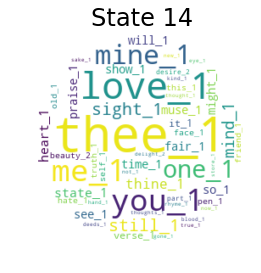

In [55]:
from HMM_helper import obs_map_reverser, mask
from wordcloud import WordCloud

def text_to_wordcloud2(text, max_words=50, filename = 'test', title='', show=True):
    plt.close('all')

    # Generate a wordcloud image.
    wordcloud = WordCloud(random_state=0,
                          max_words=max_words,
                          background_color='white',
                          mask=mask()).generate(text)

    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.savefig('plots/'+filename+'.pdf')
        plt.savefig('plots/'+filename+'.png')
        #plt.show()

    return wordcloud

def states_to_wordclouds2(hmm, obs_map, max_words=50, show=True, modelname='hmm'):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = []

    # Generate a large emission.
    emission, states = hmm.generate_emission_nWords(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)

        wordclouds.append(text_to_wordcloud2(sentence_str, max_words=max_words, filename=modelname+'_state'+str(i), title='State %d' % i, show=show))

    return wordclouds



wordclouds_hmm10_average = states_to_wordclouds2(hmm15_2, obs_map, modelname='hmm15')

In [84]:
def printMatrix(mat):
    print("  ", end = " ")
    for idx2 in range(len(mat[0])):
        print("&%4d"%idx2, end = " ")
    print("\\\\")
    for idx1 in range(len(mat)):
        print("%2d"%idx1, end = " ")
        for idx2 in range(len(mat[0])):
            print("&%.2f"%mat[idx1][idx2], end =" ")
        print("\\\\")
printMatrix(hmm10_1.A)

printMatrix(hmm10_average.A)

   &   0 &   1 &   2 &   3 &   4 &   5 &   6 &   7 &   8 &   9 \\
 0 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.01 &0.25 &0.74 \\
 1 &0.00 &0.00 &0.00 &0.87 &0.13 &0.00 &0.00 &0.00 &0.00 &0.00 \\
 2 &0.00 &0.86 &0.13 &0.00 &0.00 &0.00 &0.01 &0.00 &0.00 &0.00 \\
 3 &0.02 &0.00 &0.26 &0.01 &0.00 &0.22 &0.00 &0.00 &0.49 &0.00 \\
 4 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.15 &0.85 \\
 5 &0.05 &0.00 &0.00 &0.00 &0.00 &0.10 &0.85 &0.00 &0.00 &0.00 \\
 6 &0.00 &0.05 &0.30 &0.00 &0.00 &0.65 &0.00 &0.00 &0.00 &0.00 \\
 7 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.00 &0.12 &0.88 \\
 8 &0.00 &0.00 &0.21 &0.00 &0.00 &0.71 &0.08 &0.00 &0.00 &0.00 \\
 9 &0.00 &0.11 &0.31 &0.57 &0.00 &0.00 &0.01 &0.00 &0.00 &0.00 \\
   &   0 &   1 &   2 &   3 &   4 &   5 &   6 &   7 &   8 &   9 \\
 0 &0.00 &0.03 &0.14 &0.16 &0.13 &0.00 &0.05 &0.00 &0.25 &0.24 \\
 1 &0.17 &0.00 &0.05 &0.17 &0.04 &0.21 &0.23 &0.00 &0.12 &0.00 \\
 2 &0.00 &0.34 &0.07 &0.05 &0.00 &0.20 &0.15 &0.18 &0.00 &0.00 \\
 3 &0.29 &

## 6 - Poetry generation, part II - RNN